# COVID_WORLD_VACCINATION

In [1]:
library(tidyverse)
library(stringr)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
base_vacine<-read_csv("../input/covid-world-vaccination-progress/country_vaccinations.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  country = col_character(),
  iso_code = col_character(),
  date = col_date(format = ""),
  total_vaccinations = col_double(),
  people_vaccinated = col_double(),
  people_fully_vaccinated = col_double(),
  daily_vaccinations_raw = col_double(),
  daily_vaccinations = col_double(),
  total_vaccinations_per_hundred = col_double(),
  people_vaccinated_per_hundred = col_double(),
  people_fully_vaccinated_per_hundred = col_double(),
  daily_vaccinations_per_million = col_double(),
  vaccines = col_character(),
  source_name = col_character(),
  source_website = col_character()
)




 ## Most vaccinated countries.

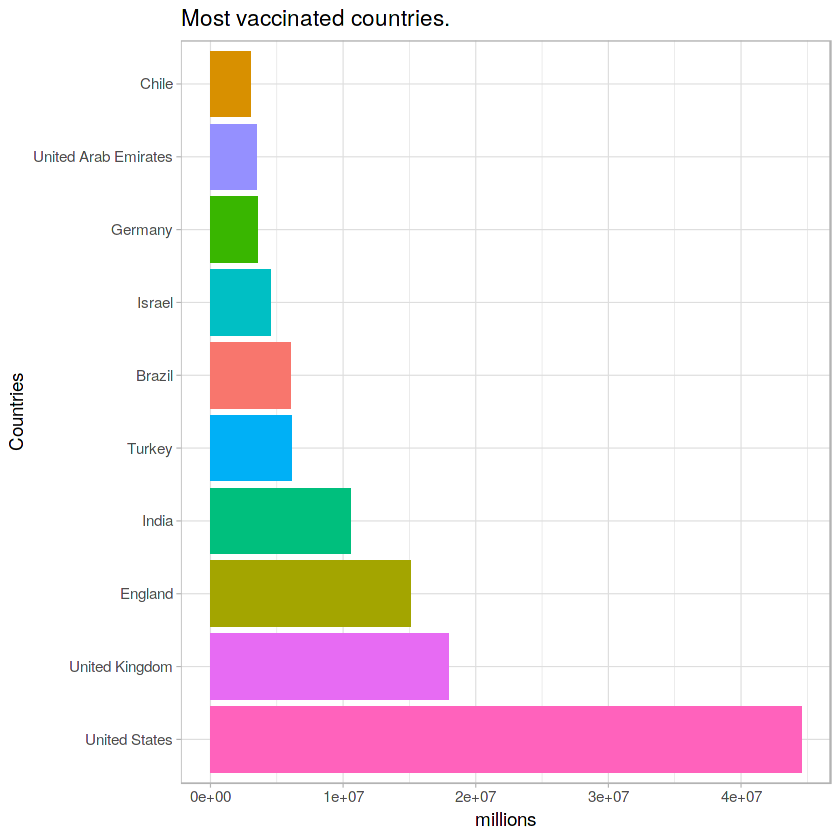

In [3]:
mais_vacinados<-base_vacine %>% filter(!is.na(people_vaccinated))  %>% select(country,date,people_vaccinated) %>% arrange(desc(people_vaccinated)) %>% distinct(country,`.keep_all` = TRUE)

maior_vacinacao<-mais_vacinados %>% arrange(desc(people_vaccinated) ) %>% head(10) %>%
    ggplot()+
        geom_col(mapping = aes(x = reorder(country,desc(people_vaccinated)),y =people_vaccinated, fill=country ), show.legend = FALSE)+
                    coord_flip()+
                theme_light()+
                    ggtitle(label = "Most vaccinated countries.")+
                        xlab(label = "Countries")+
                        ylab(label = "millions")
                
                   
                 maior_vacinacao 

## Vaccine that each country has.

In [4]:
base_vacine %>% group_by(country,vaccines) %>% distinct(country,vaccines)

country,vaccines
<chr>,<chr>
Albania,Pfizer/BioNTech
Algeria,Sputnik V
Andorra,Pfizer/BioNTech
Anguilla,Oxford/AstraZeneca
Argentina,Sputnik V
Australia,Pfizer/BioNTech
Austria,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Azerbaijan,"Oxford/AstraZeneca, Sputnik V"
Bahrain,"Pfizer/BioNTech, Sinopharm/Beijing"


## Vaccination proportional to the population.

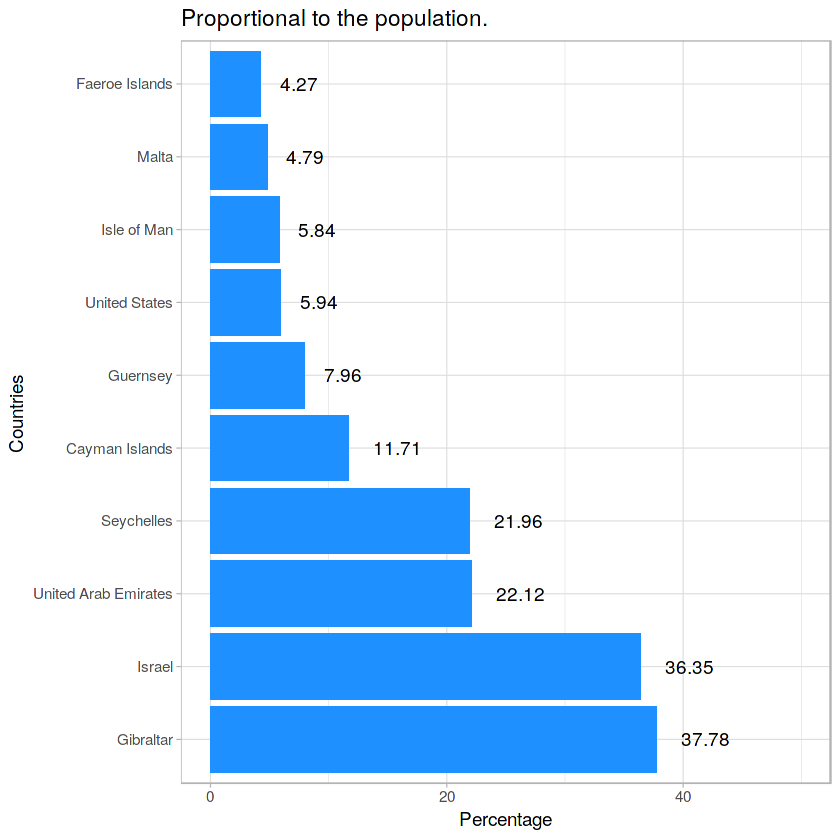

In [5]:
por_porcentagem<-base_vacine %>% filter(!is.na(people_fully_vaccinated_per_hundred)) %>% select(country,date,people_fully_vaccinated_per_hundred) %>% arrange(desc(people_fully_vaccinated_per_hundred)) %>% distinct(country,`.keep_all` = TRUE)

maior_porcetagem<-por_porcentagem %>% arrange(desc(people_fully_vaccinated_per_hundred)) %>% head(10) %>%
    ggplot()+
        geom_col(mapping = aes(x= reorder(country,desc(people_fully_vaccinated_per_hundred)),y = people_fully_vaccinated_per_hundred),fill="#1E90FF")+
                    coord_flip()+
                        theme_light()+
                            ggtitle(label = "Proportional to the population.")+
                                geom_text(aes(x = country,y =people_fully_vaccinated_per_hundred,label=people_fully_vaccinated_per_hundred ),hjust=-0.5)+
                                xlab(label = "Countries ")+
                                ylab(label = "Percentage")+
                                scale_y_continuous(limits = c(0,50),breaks = c(0,20,40))
maior_porcetagem


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




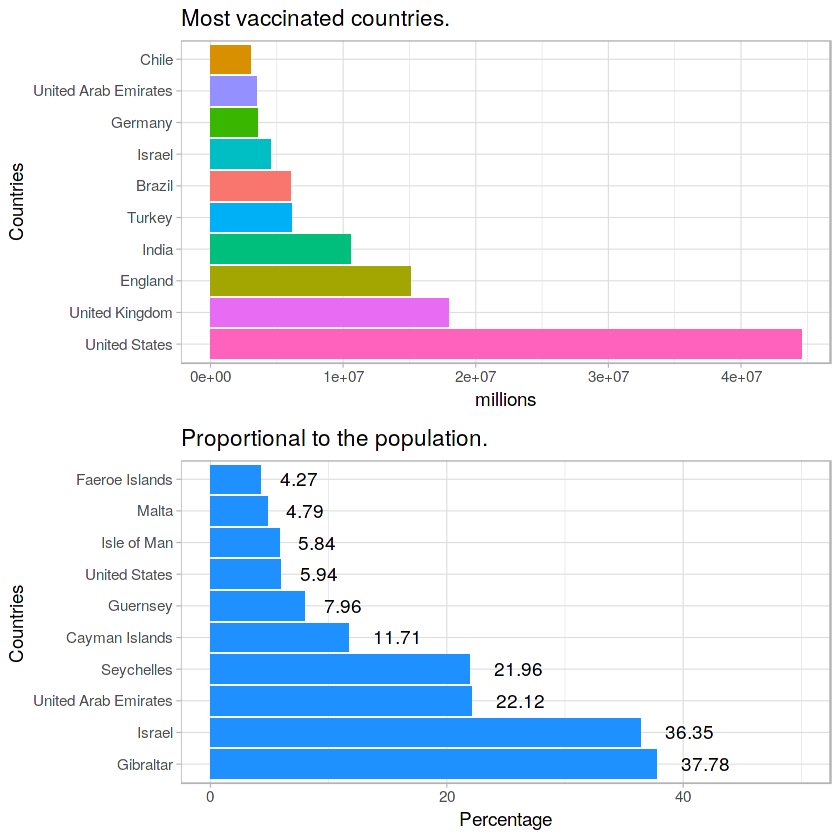

In [6]:
library(gridExtra)

grid.arrange(maior_vacinacao ,maior_porcetagem)

## MAPS

In [7]:
library(cartography)
library(rgdal)
library(sp)

Loading required package: sp

rgdal: version: 1.4-8, (SVN revision 845)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.4.0, released 2018/12/14
 Path to GDAL shared files: /usr/share/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 5.2.0, September 15th, 2018, [PJ_VERSION: 520]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.4-1 



## Shapefiles

In [8]:
my_spdf<-readOGR(dsn ="../input/world-map-2/world map",layer ="TM_WORLD_BORDERS_SIMPL-0.3",verbose = FALSE  )

In [9]:
##  filtrar para os maiores valores de vacinaçao. Sem duplicatas nos paises. Automaticamente sera filtrada o maior valor da data mais recente
### ajustar para total de vacinas.. e regiao
base_vacine<-base_vacine %>%  arrange(desc(people_fully_vaccinated)) %>% distinct(country ,.keep_all = TRUE)



In [10]:
### nome doa paises em minusculo.. igua, my_spdf
base_vacine$country<-str_to_lower(base_vacine$country,locale = "en")


### nome doa paises em minusculo..
my_spdf@data$NAME<-str_to_lower(my_spdf@data$NAME,locale = "en")

## Nomes dos atributos em minusculo
names(my_spdf@data)<-str_to_lower(string = names(my_spdf@data),locale = "en")

## Continents

In [11]:
americas<-my_spdf@data %>% filter(region == 19) ## Americas
africa<-my_spdf@data %>% filter(region == 2)  ## Africa
asia <-my_spdf@data %>% filter(region == 142)  ## Asia
europa<-my_spdf@data %>% filter(region == 150) ## Europa
oceania<-my_spdf@data %>% filter(region == 9)   ## Oceania
antartica<-my_spdf@data %>% filter(region == 0)   ## Antartica

## Continent Americas.

In [12]:
### ajustando para minusculo variaveis e paises do continente 1
names(americas)<-str_to_lower(string = names(americas),locale = "en")
americas$name<-str_to_lower(string = americas$name,locale = "en")

In [13]:
## Left Join com a base vacina
americas<- americas %>% left_join(base_vacine,by = c("name" = "country"))

In [14]:
#### Criar variavel com qtdade de vacinados divido por milhao / 
americas<-americas %>% mutate(milhoes_vacinados=people_vaccinated/1000000)

integer(0)

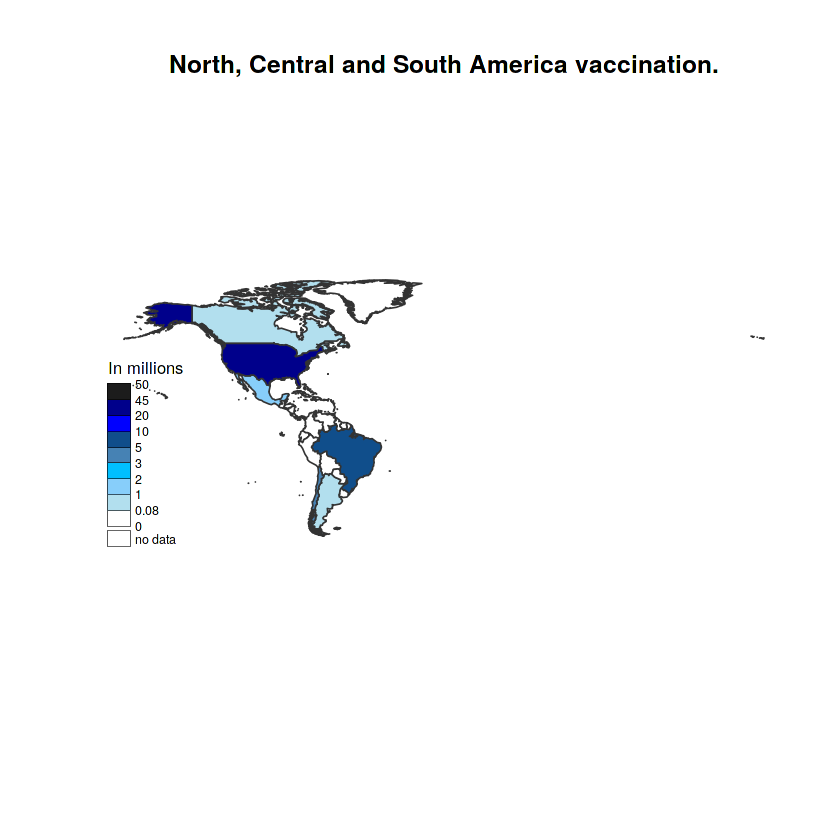

In [15]:
### Mapa americas

choroLayer(spdf = my_spdf,df = americas,var = "milhoes_vacinados",legend.title.txt = "In millions" ,legend.values.rnd = 3,nclass=9,col=c("#FFFFFF","#B2DFEE","#87CEFA","#00BFFF","#4682B4","#104E8B","#0000FF","#00008B","#1C1C1C"),breaks=c(0,0.08,1,2,3,5,10,20,45,50)) + title(main = "
North, Central and South America vaccination.")

## Continent Africa

In [16]:
### ajustando para minusculo variaveis e paises do continente 1
names(africa)<-str_to_lower(string = names(africa),locale = "en")
africa$name<-str_to_lower(string = africa$name,locale = "en")

In [17]:
## Left Join com a base vacina
africa<- africa %>% left_join(base_vacine,by = c("name" = "country"))

In [18]:
#### Criar variavel com qtdade de vacinados divido por milhao
africa<-africa %>% mutate(milhoes_vacinados=people_vaccinated/1000000)

integer(0)

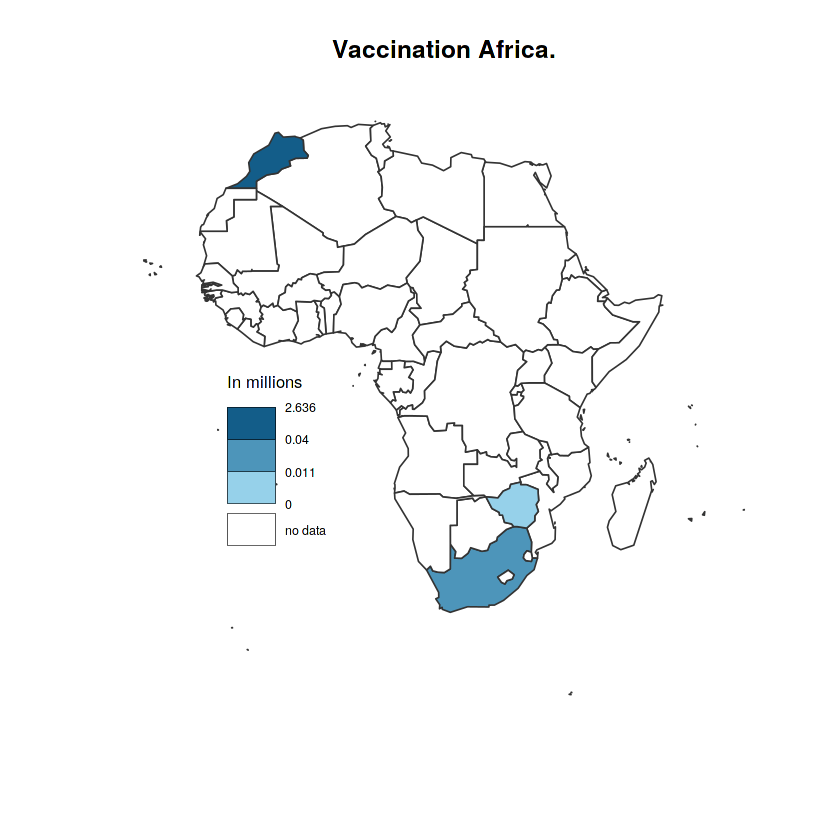

In [19]:
### Mapa Africa

choroLayer(spdf = my_spdf,df = africa,var = "milhoes_vacinados",legend.title.txt = "In millions",legend.pos = c(-13,-25),legend.values.rnd = 3) + title(main = "Vaccination Africa.")

## Continent Asia

In [20]:
## Left Join com a base vacina
asia<- asia %>% left_join(base_vacine,by = c("name" = "country"))

In [21]:
#### Criar variavel com qtdade de vacinados divido por milhao
asia<-asia %>% mutate(milhoes_vacinados=people_vaccinated/1000000)

integer(0)

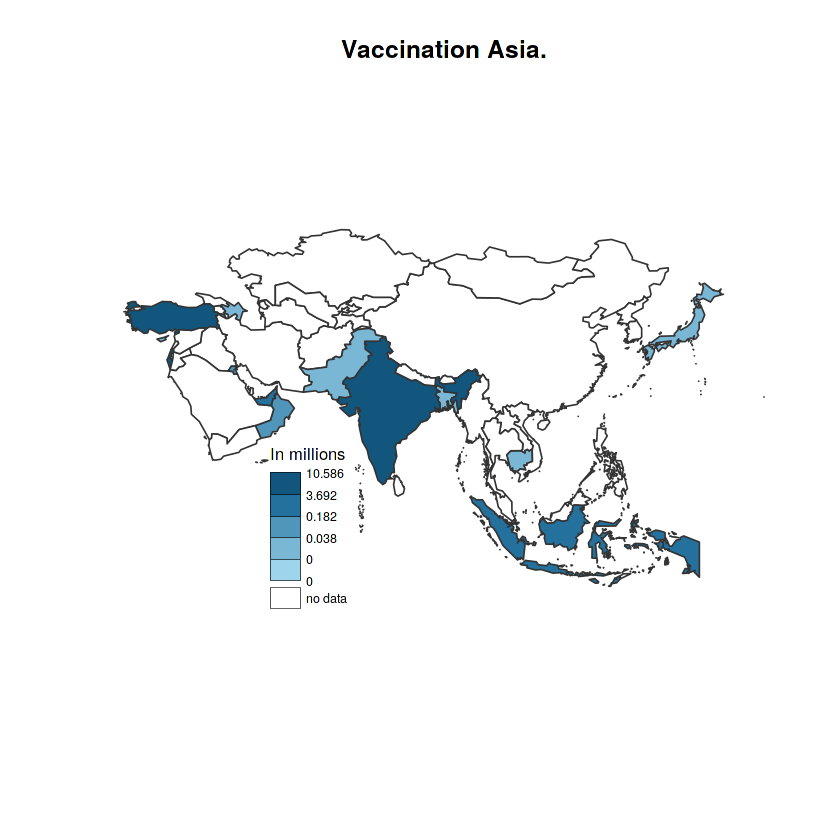

In [22]:
choroLayer(spdf = my_spdf,df = asia,var ="milhoes_vacinados",legend.title.txt = "In millions",legend.values.rnd = 3,
             legend.pos = c(55,-15) ) + title(main = "Vaccination Asia.")

## Continent Europe

In [23]:
## Left Join com a base vacina
europa<- europa %>% left_join(base_vacine,by = c("name" = "country"))

In [24]:
#### Criar variavel com qtdade de vacinados divido por milhao
europa<-europa %>% mutate(milhoes_vacinados=people_vaccinated/1000000)

integer(0)

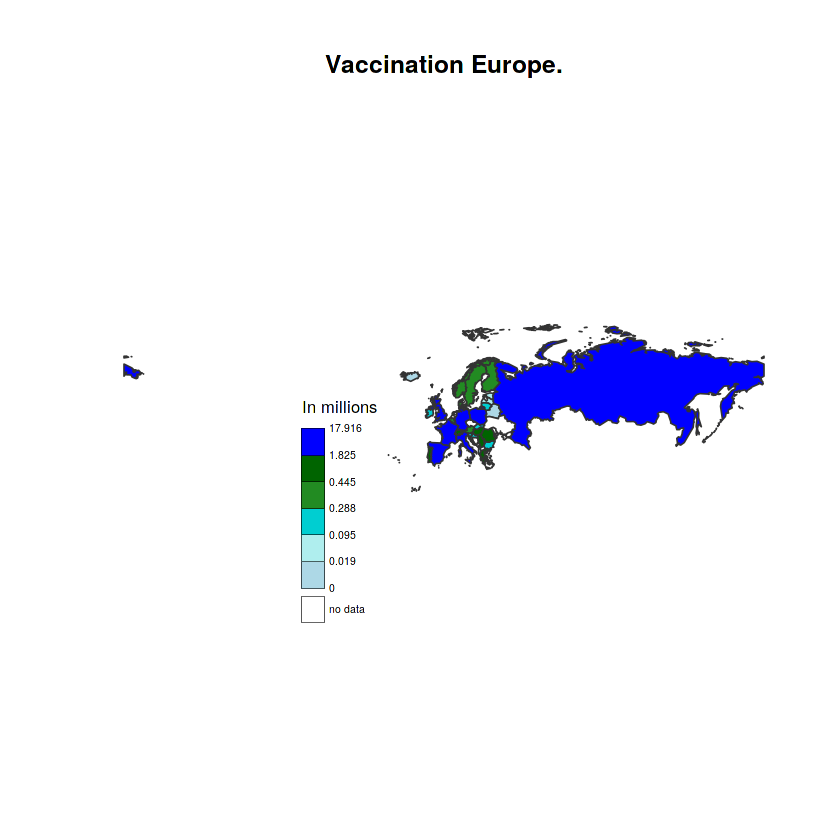

In [25]:
### Mapa Europa
choroLayer(spdf = my_spdf,df = europa,var ="milhoes_vacinados",legend.title.txt = "In millions",legend.values.rnd = 3,
             legend.pos = c(-80,-15) , legend.values.cex = 0.5, col =c("#ADD8E6","#AFEEEE","#00CED1","#228B22","#006400","#0000FF")) +title(main = "
Vaccination Europe.")

## Continent Oceania - It has no significant data.

In [27]:
## FULL JOIN com a base vacina
oceania<- oceania %>% left_join(base_vacine,by = c("name" = "country"))
#### Criar variavel com qtdade de vacinados divido por milhao
oceania<-oceania %>% mutate(milhoes_vacinados=people_vaccinated/1000000)
 ### Valores muito baixos
choroLayer(spdf = my_spdf,df = oceania,var = "people_vaccinated",legend.values.rnd = 5)

fips,iso2,iso3,un,name,area,pop2005,region,subregion,lon,⋯,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,milhoes_vacinados
<fct>,<fct>,<fct>,<int>,<chr>,<int>,<fct>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
AQ,AS,ASM,16,american samoa,20,64051,9,61,-170.730,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AS,AU,AUS,36,australia,768230,20310208,9,53,136.189,⋯,NA,NA,0,0,NA,NA,Pfizer/BioNTech,Government of Australia via covidlive.com.au,https://covidlive.com.au/vaccinations,0
BP,SB,SLB,90,solomon islands,2799,472419,9,54,160.109,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CW,CK,COK,184,cook islands,24,13984,9,61,-159.782,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
FJ,FJ,FJI,242,fiji,1827,828046,9,54,177.974,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
FM,FM,FSM,583,"micronesia, federated states of",70,110058,9,57,158.235,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
FP,PF,PYF,258,french polynesia,366,255632,9,61,-149.462,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
GQ,GU,GUM,316,guam,55,16857,9,57,144.707,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
KR,KI,KIR,296,kiribati,73,92003,9,57,175.036,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## Continent Antartica - It has no significant data.

In [31]:
## Left JOIN com a base vacina
antartica<- antartica %>% left_join(base_vacine,by = c("name" = "country"))
#### Criar variavel com qtdade de vacinados divido por milhao
antartica<-antartica %>% mutate(milhoes_vacinados=people_vaccinated/1000000)
## Nao possui valores significativos
choroLayer(spdf = my_spdf,df = antartica,var ="people_vaccinated" )

fips,iso2,iso3,un,name,area,pop2005,region,subregion,lon,⋯,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,milhoes_vacinados
<fct>,<fct>,<fct>,<int>,<chr>,<int>,<fct>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
CK,CC,CCK,166,cocos (keeling) islands,1,0,0,0,96.839,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AY,AQ,ATA,10,antarctica,0,0,0,0,21.304,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
BV,BV,BVT,74,bouvet island,0,0,0,0,3.412,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
FS,TF,ATF,260,french southern and antarctic lands,0,0,0,0,69.117,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
HM,HM,HMD,334,heard island and mcdonald islands,0,0,0,0,73.507,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
IO,IO,IOT,86,british indian ocean territory,0,0,0,0,72.416,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
KT,CX,CXR,162,christmas island,0,0,0,0,105.704,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,UM,UMI,581,united states minor outlying islands,0,0,0,0,-160.027,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SX,GS,SGS,239,south georgia south sandwich islands,0,0,0,0,-36.891,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## Worldwide vaccination.

In [32]:
mundial<-my_spdf@data %>% left_join(base_vacine,by = c("name" = "country"))

In [33]:
mundial<-mundial %>% mutate(milhoes_vacinados=people_vaccinated/1000000)

integer(0)

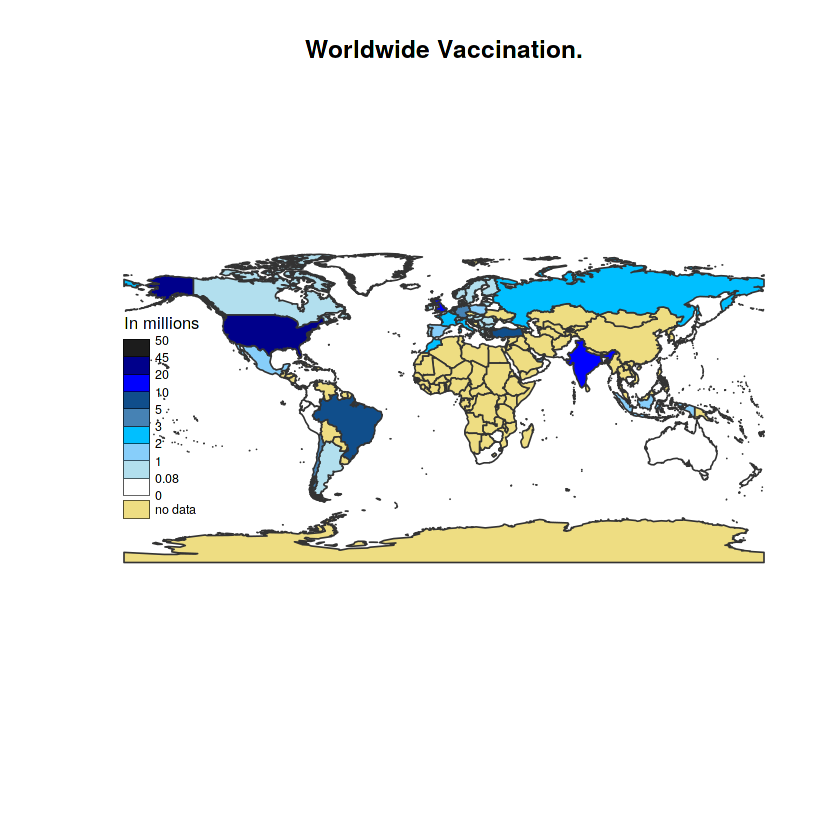

In [34]:
## Total Vacianaçao
choroLayer(spdf = my_spdf,df = mundial,var = "milhoes_vacinados",legend.pos = c(-180,-65),legend.title.txt = "In millions",
          legend.values.rnd= 2,nclass=8, colNA = "#EEDD82",col=c("#FFFFFF","#B2DFEE","#87CEFA","#00BFFF","#4682B4","#104E8B","#0000FF","#00008B","#1C1C1C"),breaks=c(0,0.08,1,2,3,5,10,20,45,50)) + title(main = "Worldwide Vaccination.")


integer(0)

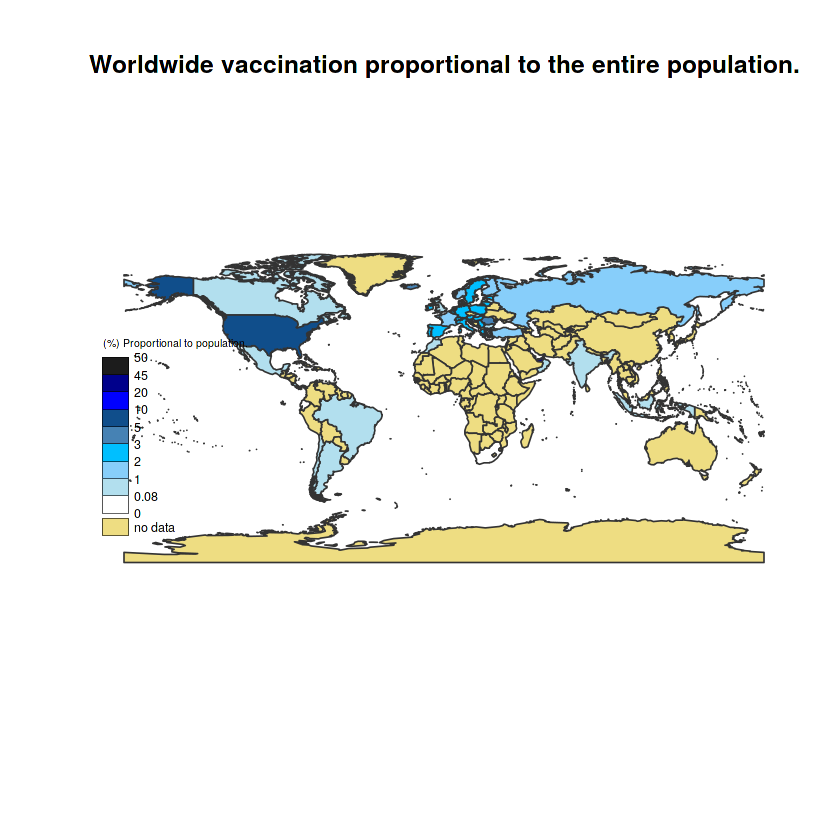

In [35]:
## Proporcional

choroLayer(spdf = my_spdf,df = mundial,var = "people_fully_vaccinated_per_hundred",legend.pos = c(-192,-75),legend.title.cex = 0.5,legend.title.txt = "(%) Proportional to population.",
          legend.values.rnd= 2,nclass=8, colNA = "#EEDD82",col=c("#FFFFFF","#B2DFEE","#87CEFA","#00BFFF","#4682B4","#104E8B","#0000FF","#00008B","#1C1C1C"),breaks=c(0,0.08,1,2,3,5,10,20,45,50)) + title(main = "
Worldwide vaccination proportional to the entire population.")